# Polynomial Linear Regression

Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x.

In general, we can model the expected value of y as an nth degree polynomial, yielding the general polynomial regression model

$$
{\displaystyle y=\beta _{0}+\beta _{1}x+\beta _{2}x^{2}+\beta _{3}x^{3}+\cdots +\beta _{n}x^{n}+\varepsilon .\,}
$$

https://en.wikipedia.org/wiki/Polynomial_regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Example
Salary vs. YearsExperienced

### Step1: Load Dataset

In [4]:
# 'Employee_Salary.csv' 파일 읽기 pd.read_csv()
# df shape 확인

df = pd.read_csv('Employee_Salary.csv')

df.shape

(2000, 2)

In [5]:
# df tail 행 보기

df.tail()

,Years of Experience,Salary
1995,19.178575,421534.6910
1996,19.254499,430478.0265
1997,19.353369,438090.8454
1998,19.842520,482242.1608
1999,20.000000,500000.0000


In [6]:
# df descriptive statistics

df.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


### Step2: Visualize Dataset

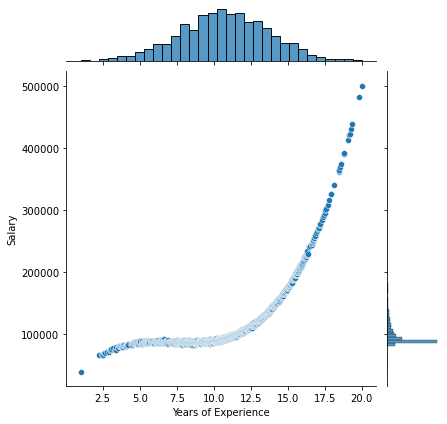

In [7]:
# sns.jointplot 활용한 시각화. x='Years of Experience	', y='Salary'

sns.jointplot(data = df, x='Years of Experience', y='Salary')

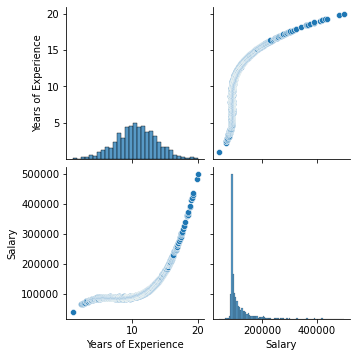

In [8]:
sns.pairplot(df)

### Step3: Define Train set and Test Set

In [9]:
# X에 -1번째 column까지 할당
# y에 -1번째 column을 할당

X = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [12]:
# split train set and test set

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test 할당. test_size=0.2, random_state=0

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Step4: Train Model

In [18]:
# from sklearn.preprocessing import PolynomialFeatures
# poly_regressor에 PolynomialFeatures(degree=2) 으로 상수항, x, x^2 할당
# X_train으로 poly_regressor에 fit

from sklearn.preprocessing import PolynomialFeatures
# X를 변화(X^0, X^1, X^2,....)시켜 주는 툴

poly_regressor = PolynomialFeatures(degree = 2)
poly_regressor.fit(X_train)

PolynomialFeatures()

In [19]:
# X_train_poly 에 fitting된 poly_regressor를 활용하여 transform

X_train_poly = poly_regressor.transform(X_train)
X_train_poly

array([[  1.        ,   9.18154382,  84.30074692],
       [  1.        ,   6.40354414,  41.0053776 ],
       [  1.        ,  14.87221216, 221.18269453],
       ...,
       [  1.        ,  13.55698336, 183.79179782],
       [  1.        ,   9.07425455,  82.34209573],
       [  1.        ,   9.56750172,  91.5370891 ]])

In [30]:
X_train.head(1)

,Years of Experience
582,9.181544


In [21]:
# define regressor type, and fit with train set

# from sklearn.linear_model import LinearRegression
# regressor 에 LinearRegression() 오브젝트 할당
# X_train, y_train 으로 regressor fit

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)



LinearRegression()

In [23]:
# regression model's Estimated coefficients

# regressor 의 coefficient 확인

regressor.coef_

array([     0.        , -33944.67297428,   2129.56446362])

In [24]:
# regression model's independent term in the linear model.
# Set to 0.0 if fit_intercept = False.

# regressor의 intercept 확인

regressor.intercept_

212027.24673409504

### Step5: Predict value

In [27]:
# predict y values with trained regressor

# regressor.predict 활용하여 X_test로 y_pred 생성. 
# X_test에는 polinomial term이 생기도록 poly_regressor.transform 해주어야 함.



X_test_poly = poly_regressor.transform(X_test)
y_pred = regressor.predict(X_test_poly)


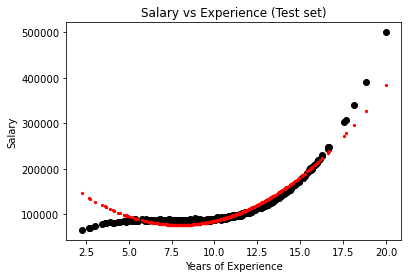

In [28]:
# test set visualization
plt.scatter(X_test, y_test, color='black')
plt.scatter(X_test, regressor.predict(X_test_poly), color='red', s=5)

plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Step6: Evaluate Model

In [29]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

# RMSE(평균 제곱근 오차(Root Mean Square Error))
# https://en.wikipedia.org/wiki/Root-mean-square_deviation
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = np.mean( np.abs((y_test - y_pred) / y_test ) ) * 100

print('RMSE =',RMSE, 
      '\nMSE =',MSE, 
      '\nMAE =',MAE, 
      '\nR2 =', r2, 
      '\nAdjusted R2 =', adj_r2, 
      '\nMean Absolute Percentage Error =', MAPE, '%') 


RMSE = 12973.702174253565 
MSE = 168316948.1062317 
MAE = 8108.655524812913 
R2 = 0.9166859933265158 
Adjusted R2 = 0.9164766616514568 
Mean Absolute Percentage Error = 7.85861879750582 %
